<a href="https://colab.research.google.com/github/abigailcrowo/DS3001-SP26/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
#I used copilot to guide some questions



#Question 1 Answer & Explanations
from google.colab import drive
import pandas as pd

#On my computer, I created a folder titled "DATA" and I dragged the datasets from GITHUB into it.
#From there, I dragged & dropped the folder into my google drive.
#My plan was to mount the code to my google drive, rather than directly uploading from my desktop.
#The below chunk of code loads in the data file that I wish to use for this specific question.
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DATA/airbnb_hw.csv")

#This begins the data cleaning process.
#By replacing the $ with '', it creates consistency between all data values.
#Next, by simply replacing any , with '', consistency is ensured again.
#For example, the numbers 675 and 1,112 are interpreted differently.
#All commas must be removed.
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].str.replace(',', '', regex=False)
#Attempts to convert all data values into numbers.
#However, this won't change empty values into numbers.
#Sees where there is missing values.
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#Prints the number of missing values in price.
missing_count = df['Price'].isna().sum()
print("Number of missing values in Price:", missing_count)

print(df['Price'].head())
#By looking at the output, it appears that there are 0 missing values.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of missing values in Price: 0
0    145
1     37
2     28
3    199
4    549
Name: Price, dtype: int64


In [ ]:
#Question 2 answer & explanations

#Insert pandas as pandas is used in the function
#Import drive as well because the data will be used from google drive
import pandas as pd
from google.colab import drive

#Mount google drive
drive.mount('/content/drive')

#Using the data "mn_police_use_of_force.csv"
#Load it from google drive
#Before, I uploaded a folder named DATA to my google drive
#The folder contains the necesary datasets
df = pd.read_csv("/content/drive/MyDrive/DATA/mn_police_use_of_force.csv")

#This step is carried out to standarized the data
#Create consistency between all data inputs
#As in the instrurctions, it asks to create consistency for yes to be Yes, and no to be No
#Yes when a person was injured by police
#No when a person was not injured
#Missing values will still be NA
df['subject_injury'] = df['subject_injury'].str.strip().str.lower()
df['subject_injury'] = df['subject_injury'].map({'yes': 'Yes', 'no': 'No'})

#Calulate the proportion of missing values
#Takes the number of missijng entries
#Calculates the number of missing values in respect to all values
#The proportion is then printed
missing_prop = df['subject_injury'].isna().mean()
print("Proportion missing:", missing_prop)

#In the instructions it asks to cross-tabulate the cleaned 'subject_injury' variable with force type.
#I did so using the cross tab function
#This function cross tabs force type with the new subject injury.
#The result is printed (crosstab) of force type and subject injury.
crosstab = pd.crosstab(df['force_type'], df['subject_injury'], dropna=False)
print(crosstab)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Proportion missing: 0.7619342359767892
subject_injury                 No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


In [ ]:
#Question 3 answer and explanations


import pandas as pd
import numpy as np
from google.colab import drive

#The google drive was already mounted
#Mounting again in order to play it safe
drive.mount('/content/drive')

#Load the dataset
#This dataset is from the lecture
#Found in Canvas
df = pd.read_csv("/content/drive/MyDrive/DATA/pretrial_data.csv")

#The variable is simply called released
#At first I was having errors because I was reffering to the longer name in the prompt
#Similiar to last problems, clean the vairbale.
#All spaces were removed
#Everything was made lowercase
#Everything was ensured to be a string
#This ensures consistency
df['released'] = (
    df['released']
    .astype(str)        # ensure string for cleaning
    .str.strip()        # remove spaces
    .str.lower()        # normalize case
)

#Dummy Variables
#In this set, there is a mix of variables being used, that all refer to the same thing essentially.
#Therefore, yes, released, and 1 all correspond to a binary number of 1
#On the other hand, no, detained, and 0 all indicate a binary number of 0.
#Mapping the dummy varuables
mapping = {
    'yes': 1, 'released': 1, '1': 1,
    'no': 0, 'detained': 0, '0': 0
}
df['released'] = df['released'].map(mapping)

#As a result, anything that is not mapped is missing.
#Only select inputs were mapped.
#Again, yes, released, and 1 all indicate a 1.
#No, detained, and 0 all indicate 0.
#Otherwise, a missing value.
df['released'] = df['released'].apply(lambda x: x if x in [0,1] else np.nan)

#Check missing values
#Numbers & Proportions
#Missing values are NA
print("Number missing:", df['released'].isna().sum())
print("Proportion missing:", df['released'].isna().mean())

# Preview cleaned column
#Print the result
print(df['released'].head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number missing: 22986
Proportion missing: 1.0
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: released, dtype: float64


In [ ]:
#Question 4 answer and explanations
#Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent
# variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)
import pandas as pd
import numpy as np
from google.colab import drive

# Mount Google Drive
#Although Drive is already mounted from previous problems
#Rather be safe than sorry
drive.mount('/content/drive')

# Load dataset
#Same dataset as last problem
df = pd.read_csv("/content/drive/MyDrive/DATA/pretrial_data.csv")

#Any values that could be resembling any sort of missiningness are marked as missing.
#Cleaning Data process begins
df['sentence'] = df['sentence'].replace(['NA', 'nan', '', ' '], np.nan)

#Explore missingness by sentence type
#Various types of data
#Inconsistencies in the data
#Everything needs to remain consistent in order to properly assess missingness
missing_by_type = pd.crosstab(
    df['sentence_type'],
    df['sentence'].isna(),
    normalize='index'
)
#Final result
#Print the proportion of missing sentence values
#Sorted by sentence type
print("Proportion of missing sentence values by sentence type:")
print(missing_by_type)


# Redo the final missing values
#Ensure values are correct
print("Number missing after cleaning:", df['sentence'].isna().sum())
print("Proportion missing after cleaning:", df['sentence'].isna().mean())

# Preview cleaned column
print(df[['sentence_type','sentence']].head(20))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Proportion of missing sentence values by sentence type:
sentence       False
sentence_type       
0.0              1.0
1.0              1.0
2.0              1.0
4.0              1.0
Number missing after cleaning: 274
Proportion missing after cleaning: 0.011920299312625076
    sentence_type    sentence
0             NaN         NaN
1             0.0   60.000000
2             1.0   12.000000
3             1.0    0.985626
4             4.0    0.000000
5             0.0   12.000000
6             1.0   36.000000
7             0.0    6.000000
8             1.0   24.000000
9             1.0   12.000000
10            0.0    5.913758
11            4.0    0.000000
12            4.0    0.000000
13            1.0  120.000000
14            1.0   24.000000
15            4.0    0.000000
16            4.0    0.000000
17            0.0   12.000000
18            4.0    0.00000

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           Date    Year        Type    Country State  \
0  20th January  2026.0  Unprovoked  Australia   NSW   
1  19th January  2026.0  Unprovoked  Australia   NSW   
2  19th January  2026.0  Unprovoked  Australia   NSW   
3  18th January  2026.0  Unprovoked  Australia   NSW   
4  10th January  2026.0  Unprovoked  Australia   NSW   

                                Location           Activity             Name  \
0  Point Plomber North of Port Macquarie            Surfing   Paul Zvirdinas   
1                                Dee Why            Surfing          Unknown   
2                          North Steyne             Surfing  Andre de Ruyter   
3   Nielsen Park Vaucluse Sydney Harbour  Jumping off rocks       Nico Antic   
4                           Avalon Beach            Surfing     Paul Stanton   

  Sex Age  ...                         Species       

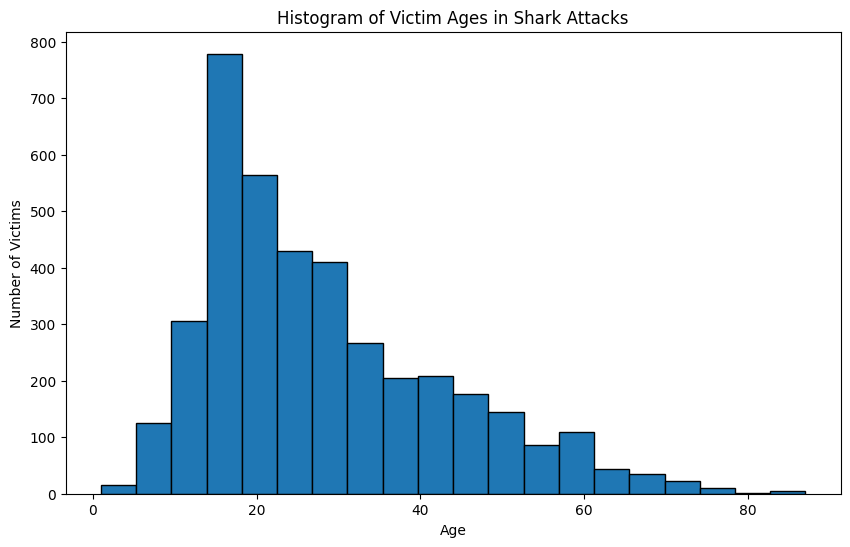

Age range: 1.0 to 87.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Proportion of victims who are male: 0.875
Proportion of attacks that are unprovoked: 0.739
Type_clean
Unprovoked    5222
Unknown       1204
Provoked       644
Name: count, dtype: int64
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in dataset: Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
Using column: Fatal Y/N
Cleaned Fatal values:
Fatal_clean
N          4939
Y          1488
Unknown     643
Name: count, dtype: int64
Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
  

In [ ]:
#Question 2
#Every question is treated as a seperate component.
#Therefore, I imported the data over again each time.
#Shark Data

#Part 1
#Upload the data
#It isn't a typical csv file, rather, it's an excel file.
import pandas as pd
from google.colab import drive
#Mount google drive
drive.mount('/content/drive')
#Load the specific excel file that was uploaded to a folder named DATA
#This folder was then uploaded to my google drive.
df = pd.read_excel("/content/drive/MyDrive/DATA/GSAF5.xls")
#Print the data
print(df.head())
print(df.info())




#Part 2
#Drop any rows or columns which don't contain data
#This step handles missing values
#Essentially cleans the data
#Import pandas again
#Import the drive
#This is a new question
import pandas as pd
from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')
#Load the Excel file
df = pd.read_excel("/content/drive/MyDrive/DATA/GSAF5.xls")
#Drop columns with no data at all
df = df.dropna(axis=1, how='all')
#Inspect the cleaned DataFrame
print("Remaining columns:", df.columns)
print(df.head())



#Part 3
#Clean the year variable
#Import pandas
#Import numpy (will be needed for this specific function)
import pandas as pd
import numpy as np
#Load the dataset
#Not a csv, but an excel file.
#Still uploaded from my drive
df = pd.read_excel("/content/drive/MyDrive/DATA/GSAF5.xls")
# Clean the Year column
#This specifically cleans the year colummn
#Converted to numbers
#Ensures consistency by making everything an integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].astype('Int64')
#This prints out the range of years
print("Year range:", df['Year'].min(), "to", df['Year'].max())
#There is a wide range of values. Values range from 0 to 7069. This is a large range.
#There is a large range of values as well in regard to year.
#Year values range all the way until 2026.
#Focuses on attacks since 1940.
#The number of attacks has increased over time.
#There are better tracking methods and more media coverage.


#Part 4
#Clean the Age variable and make a histogram of the ages of the victims.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#Load the dataset (same dataset)
df = pd.read_excel("/content/drive/MyDrive/DATA/GSAF5.xls")
#Clean the age variable
#Strip spaces
#Make all lowercase
#This allows for lowercase
#Get rid of all missing variables
def clean_age(age):
    if pd.isna(age):
        return np.nan
    age = str(age).strip().lower()
    #This averages all ages that are ranges
    #Age ranges are not consistent with the rest of the data
    #For example, if the range is 20-30, the value would be 25 as it adds the lowest
    #and highest and divides by 2
    if re.match(r'^\d+\s*-\s*\d+$', age):
        low, high = age.split('-')
        return (int(low) + int(high)) / 2
    #This handles ranges that are phrased with the word "to" versus "-"
    #For example, if you are given the range "20 to 30" you will be outputted 25
    #Creates consistency in the data
    if re.match(r'^\d+\s*to\s*\d+$', age):
        low, high = age.split('to')
        return (int(low) + int(high)) / 2
    #This makes a common value for words
    #Words are strings, not integers
    #Not consistent with rest of data
    #This creates a common key
    if "teen" in age:
        return 16
    if "child" in age:
        return 9
    if "adult" in age:
        return 30
    # Convert to number if possible
    try:
        return float(age)
    except:
        return np.nan
# Apply cleaning
df['Age_clean'] = df['Age'].apply(clean_age)
#Remove missing values
ages = df['Age_clean'].dropna()
#This is the code to create a histogram
plt.figure(figsize=(10,6))
plt.hist(ages, bins=20, edgecolor='black')
plt.title("Histogram of Victim Ages in Shark Attacks")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.show()
#Print the final histogram
print("Age range:", ages.min(), "to", ages.max())



#Part 5
#What proportion of victims are males?
import pandas as pd
import numpy as np
from google.colab import drive
#Connect google drive (again)
drive.mount('/content/drive')
#Load dataset (not a csv, rather an excel file)
df = pd.read_excel("/content/drive/MyDrive/DATA/GSAF5.xls")
#This focuses on the sex column
#By doing so, I can differentiate between male versus female
#I can strictly focus on the male facts
df['Sex'] = df['Sex'].astype(str).str.strip().str.upper()
# Keep only valid entries (M or F)
#Ensure no missing values, only relevant categories for this topic
valid_sex = df[df['Sex'].isin(['M','F'])]
#Calculate the proportion that are male
prop_male = (valid_sex['Sex'] == 'M').mean()
#Final answer
print("Proportion of victims who are male:", round(prop_male, 3))


#Part 6
#Clean the Type variable so it only takes three values:
#Provoked and Unprovoked and Unknown.
#What proportion of attacks are unprovoked?
#Import pandas and numpy
import pandas as pd
import numpy as np
#Load dataset
df = pd.read_excel("/content/drive/MyDrive/DATA/GSAF5.xls")
#Clean the specific variable "Type"
#Strip of all spaces
#Make lowercase
df['Type'] = df['Type'].astype(str).str.strip().str.lower()
#Map unprovoked to Unprovoked
#Map provoked to Provoked
#This creates consistency
mapping = {
    'unprovoked': 'Unprovoked',
    'provoked': 'Provoked'
}
#This carries out the mapping function
#Fills in unknowns
df['Type_clean'] = df['Type'].map(mapping)
df['Type_clean'] = df['Type_clean'].fillna('Unknown')
# Calculate proportion of unprovoked attacks
prop_unprovoked = (df['Type_clean'] == 'Unprovoked').mean()
#Prints the final result
print("Proportion of attacks that are unprovoked:", round(prop_unprovoked, 3))
print(df['Type_clean'].value_counts())

#Step 7
#Import necesary componenets again
import pandas as pd
import numpy as np
from google.colab import drive
#Set up google drive again
drive.mount('/content/drive')
#Load the dataset (again)
df = pd.read_excel("/content/drive/MyDrive/DATA/GSAF5.xls")
#Identify the correct column that is relevant in this problem
print("Columns in dataset:", df.columns)
#Use the fatal column
fatal_col = [col for col in df.columns if 'Fatal' in col][0]
print("Using column:", fatal_col)
#Clean the column
#Strip spaces
#Make lowercase
#Ensure all strings
#This allows for consistency
df['Fatal_clean'] = df[fatal_col].astype(str).str.strip().str.lower()
#Carry out the correct mapping
mapping = {
    'y': 'Y',
    'n': 'N'
}
df['Fatal_clean'] = df['Fatal_clean'].map(mapping)
#Something that is not Y or N is unknown
df['Fatal_clean'] = df['Fatal_clean'].fillna('Unknown')
#Print results
print("Cleaned Fatal values:")
print(df['Fatal_clean'].value_counts())




#Part 8
#It appears that men are more likely to be attacked by sharks.
#However, all of these provoked attacks are fatal.
#While the likehood of men being attacked is greater than women, fatal attacks are more prevelant in women.
#Sharks are necesary to the ecoysystem.
#While they are very dangerous, they are not actually ask dangerous as their reputation suggests.



#Part 9
#Import pandas and numpy again.
# Check actual column names
print(df.columns)
# Automatically find the column that contains 'Species'
species_col = [col for col in df.columns if 'Species' in col][0]
print("Using column:", species_col)
# Clean that column
#Make a string
#Take out spaces
#Make lowercase
#Creates consistency
df['Species_clean'] = df[species_col].astype(str).str.strip().str.lower()
#Seperate into seperate words
df['Species_split'] = df['Species_clean'].str.split()
#Point out the rows with the correct key words.
df['is_white'] = df['Species_split'].apply(lambda words: 'white' in words if isinstance(words, list) else False)
# Calculate proportion
prop_white = df['is_white'].mean()
#Print results
print("Proportion of attacks by white sharks:", round(prop_white, 3))
#Output
print(df['is_white'].value_counts())





**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. How to make data cleaning as easy as possible? This paper addresses data tidying. Data tidying is an important component of data cleaning.

2. Data tidying is very important in data cleaning. However, it is not commonly addressed. It has not been explored much. By doing so, data analysts can actually spend more time analyzing rather than cleaning the data.

3. What this means is that they are all similiar in some sense. When being in the same family, you contain some similiarities. However, all datasets vary from one to the other. Observations and variables differ from one another as they are different categories. However, within these categories it's hard to differentiate.

4. Values are numbers or strings.
Every value belongs to a variable.
Every value belongs to an observation.

5. Tidy data is a standardized way of mapping the overall meaning of a dataset to its structure. A dataset is either messy or tidy.

6. 1.Column headers are values, not variables names 2. Multiple variables are stored in one column. 3. Variables are stored in both rows and columns. 4. Multiple types of observational units are stored in the same table. 5. A single observational unit is stored in multiple tables.
Table 4 is messy because the data is not cleaned. There are missing values and inconsistencies in the data. Melting a dataset refers to reshaping it.

7. Table 11 is messy because the data is not consistent nor organized. Table 12 is tidy because the table is consistent and organized. Not messy. This is where these titles come from.

8. The tidy tools refers to the way in which it depends on tidy data. This is in reference to the chicken and eggs. Tidy datasets are still not going to be produced if there is not a positive outcome. Therefore, he is hopeful that data tidying becomes more popular for data wrangling.